# **AMRN STOCK PRICE PREDICTION USING REGRESSION**    -

##### **Project Type**    - End to End Machine Learning
##### **Contribution**    - Team
#####                       Team Member 1 - Yash Kumar
#####                       Team Member 2 - Taniya Yadav
#####                       Team Member 3 - Vivek Mishra

# **Project Summary -**

.........................................

# **Problem Statement**


...........

# **Objective**


..............

# ***Let's Start !***

## ***Step 1. Know Your Data***

### Import Libraries and connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from scipy import stats

In [ ]:
from sklearn.preprocessing import (MinMaxScaler,StandardScaler)              #scaling the data
from sklearn.model_selection import train_test_split                        # split train and test data

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

import warnings
warnings.filterwarnings('ignore')

### Data Gathering from API

In [ ]:
# import requests

# url = "https://yh-finance.p.rapidapi.com/stock/v3/get-historical-data"

# querystring = {"symbol":"AMRN","region":"US"}

# headers = {
# 	"X-RapidAPI-Key": "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx",
# 	"X-RapidAPI-Host": "yh-finance.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)
# res=response.json()

### Converting it into dataframe and make a csv file

In [ ]:
# data=pd.DataFrame(gh['prices'],columns=['date','open','high','low','close','volume','adjclose'])
# data.to_csv('AMRN_stock_price.csv')

### Dataset Loading

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/AMRN_stock_price.csv')

### Dataset First View

In [ ]:
# data = pd.read_csv('/content/AMRN_stock_price.csv')
data.head()

,Unnamed: 0,date,open,high,low,close,volume,adjclose
0,0,1707489000,1.25,1.25,1.21,1.22,985700,1.22
1,1,1707402600,1.20,1.25,1.20,1.23,810400,1.23
2,2,1707316200,1.23,1.25,1.19,1.20,931200,1.20
3,3,1707229800,1.17,1.24,1.17,1.23,978500,1.23
4,4,1707143400,1.15,1.20,1.15,1.18,670000,1.18


### Dataset Rows & Columns count

In [ ]:
num_rows, num_cols = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 251
Number of columns: 8


### Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  251 non-null    int64  
 1   date        251 non-null    int64  
 2   open        251 non-null    float64
 3   high        251 non-null    float64
 4   low         251 non-null    float64
 5   close       251 non-null    float64
 6   volume      251 non-null    int64  
 7   adjclose    251 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 15.8 KB


### Check for Null/Missing Values

In [ ]:
data.isnull().sum()

Unnamed: 0    0
date          0
open          0
high          0
low           0
close         0
volume        0
adjclose      0
dtype: int64

### Check for duplicated rows

In [ ]:
data.duplicated().sum()

0

### What did you know about your dataset?

* We get this data from yahoo finance by calling there public API to get their AMRN stock price for US region.
This API reproduces live PUBLIC data and features of finance.yahoo.com. The response data is always live and synced with the site at request time. You are going to get almost everything that you see PUBLICLY on the site.

* As per the above information, we can see the columns open, high, low, close are float type while date and volume are int type of data.

**There are 251 rows and 7 columns**

**There are no null values present in our data**

**There are no duplicated rows present in our data**

**The following columns are listed in the DataFrame-**
* date - It describes the date on which prices is defined but it's in encrypted form so we have to handle it and according to offset we have to convert in into datetime.
* open - It describes at what price the stock is open on that date.
* high - It describes the maximum price the stock is on that date.
* low - It describes the minimum price the stock is on that date.
* close- It describes at what price the stock is close on that date.
* volume - It describes the volume of shares on that date.
* adjclose - It describes the adjacent close price on that date.

## ***Step 2. Understanding Our Data***

#### Columns present in our data

In [ ]:
data.columns

Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close', 'volume',
       'adjclose'],
      dtype='object')

#### Mathematical/Statistical description of our data

In [ ]:
data.describe()

,Unnamed: 0,date,open,high,low,close,volume,adjclose
count,251.000000,2.510000e+02,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,125.000000,1.691799e+09,1.156614,1.189124,1.119442,1.153386,2.473797e+06,1.153386
std,72.601653,9.101413e+06,0.319761,0.325097,0.304792,0.313870,2.305236e+06,0.313870
min,0.000000,1.676039e+09,0.680000,0.700000,0.650000,0.660000,3.615000e+05,0.660000
25%,62.500000,1.683855e+09,0.885000,0.920000,0.850000,0.885000,1.248500e+06,0.885000
50%,125.000000,1.691761e+09,1.150000,1.190000,1.120000,1.160000,1.895500e+06,1.160000
75%,187.500000,1.699497e+09,1.310000,1.340000,1.260000,1.310000,2.907150e+06,1.310000
max,250.000000,1.707489e+09,2.050000,2.170000,1.970000,2.060000,2.038320e+07,2.060000


In [ ]:
data.columns


Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close', 'volume',
       'adjclose'],
      dtype='object')

## ***Step 3. Data Cleaning***

###1. firstly we make a copy of our dataset for data cleaning and manipulation to prevent the data loss in future

In [ ]:
df = data.copy()

In [ ]:
df.head()

,Unnamed: 0,date,open,high,low,close,volume,adjclose
0,0,1707489000,1.25,1.25,1.21,1.22,985700,1.22
1,1,1707402600,1.20,1.25,1.20,1.23,810400,1.23
2,2,1707316200,1.23,1.25,1.19,1.20,931200,1.20
3,3,1707229800,1.17,1.24,1.17,1.23,978500,1.23
4,4,1707143400,1.15,1.20,1.15,1.18,670000,1.18


###2. here we can see there is a extra `Unnamed` index column present in our dataset so will be drop this column

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

###3. lets check for missing values and duplicate rows in our dataset

In [ ]:
df.isnull().sum()

Unnamed: 0    0
date          0
open          0
high          0
low           0
close         0
volume        0
adjclose      0
dtype: int64

In [ ]:
df.duplicated().sum()

0



*   In our dataset there is no null values
*   there is no duplicated rows

---


so we will directly going to check for outliars in our dataset



###4. Outliars detection and removal

we have plot Boxplot of all columns to see any potential outliars in our dataset

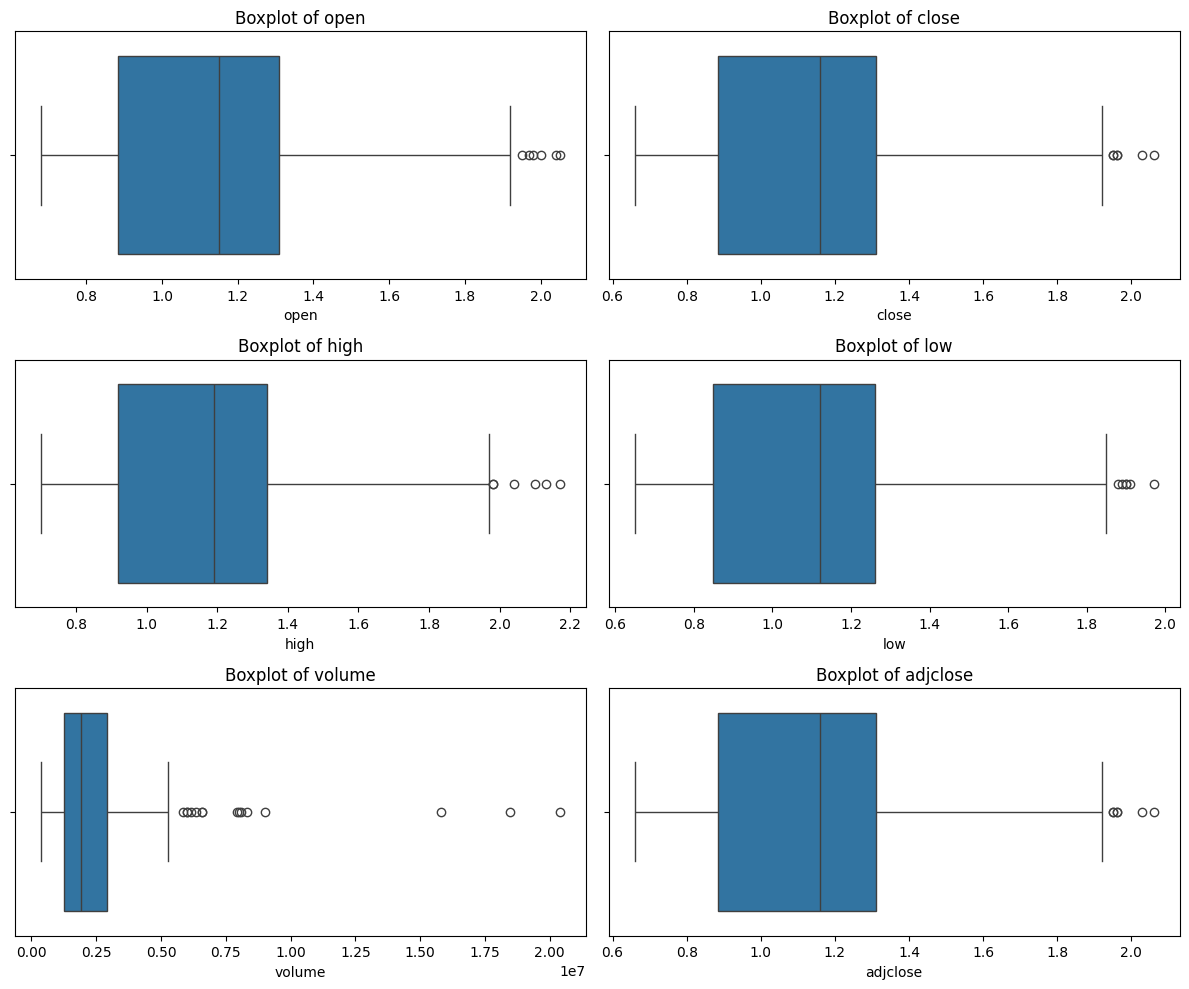

In [ ]:

# Create subplots
key_variables = ['open','close', 'high', 'low',  'volume','adjclose']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Plot box plots for each variable
for i, variable in enumerate(key_variables):
    sns.boxplot(x=variable, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {variable}')

plt.tight_layout()
plt.show()


*   we can see there is no significant outliars present in our dataset and some extreme values could be our genuine data points.


## ***Step 4. Data Manipulation***

1. in our dataset `Date` was in some other timestamp format so we change the date column to the standard date format

In [ ]:
# timezone_offset = res['timeZone']['gmtOffset']
timezone_offset = -18000

In [ ]:
df['date'] = df['date'].apply(lambda x: datetime.utcfromtimestamp(x) + timedelta(seconds=timezone_offset))
df['date']=pd.to_datetime(df['date']).dt.date

In [ ]:
df.head()

,Unnamed: 0,date,open,high,low,close,volume,adjclose
0,0,2024-02-09,1.25,1.25,1.21,1.22,985700,1.22
1,1,2024-02-08,1.20,1.25,1.20,1.23,810400,1.23
2,2,2024-02-07,1.23,1.25,1.19,1.20,931200,1.20
3,3,2024-02-06,1.17,1.24,1.17,1.23,978500,1.23
4,4,2024-02-05,1.15,1.20,1.15,1.18,670000,1.18


2. we sort our dataset by date for further analysis

In [ ]:
df = df.sort_values('date')

3. we set date as index and convert it into datetime format

In [ ]:
df.set_index('date',inplace = True)

In [ ]:
# we changed the index of dataset to datetime format for further analysis
df.index= pd.to_datetime(df.index)

In [ ]:
df.head()

,Unnamed: 0,open,high,low,close,volume,adjclose
date,,,,,,,
2023-02-10,250,2.04,2.04,1.88,1.92,3175500,1.92
2023-02-13,249,1.98,1.98,1.90,1.96,2276400,1.96
2023-02-14,248,1.92,1.97,1.90,1.96,1711500,1.96
2023-02-15,247,1.95,1.95,1.89,1.90,2365100,1.90
2023-02-16,246,1.92,1.93,1.85,1.87,3725100,1.87


## ***Step 5. Data Visualization***

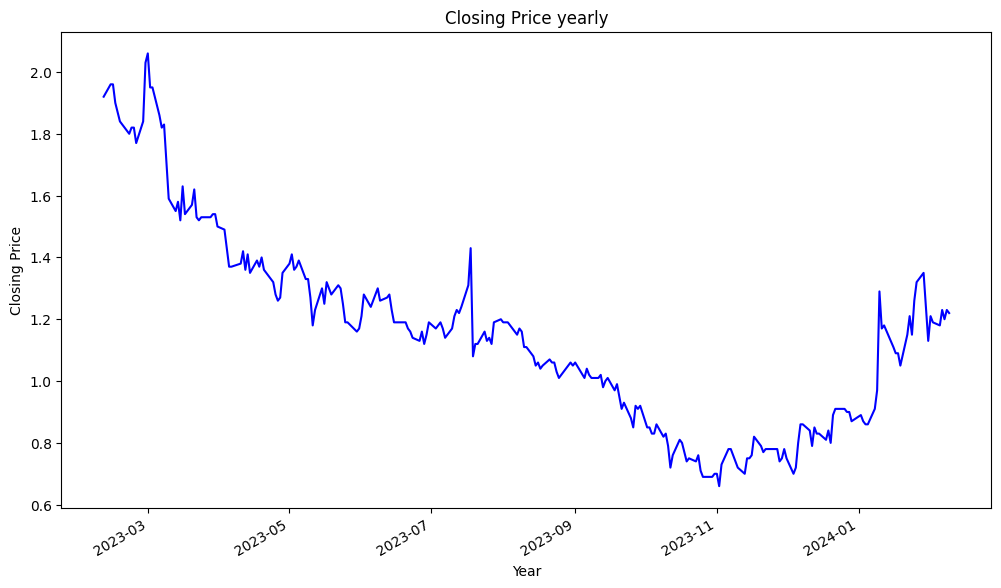

In [ ]:
plt.figure(figsize=(12,7))
df['close'].plot(color = 'b')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()

1. Why did you pick the specific chart?

Since line charts are particularly useful for displaying trends and patterns in data over time so it is appropriate to use this here.

2. What is/are the insight(s) found from the chart?

It can seen that from the 3rd month of 2023 closing price was declining but after the 11th month of the same year it started to increase.

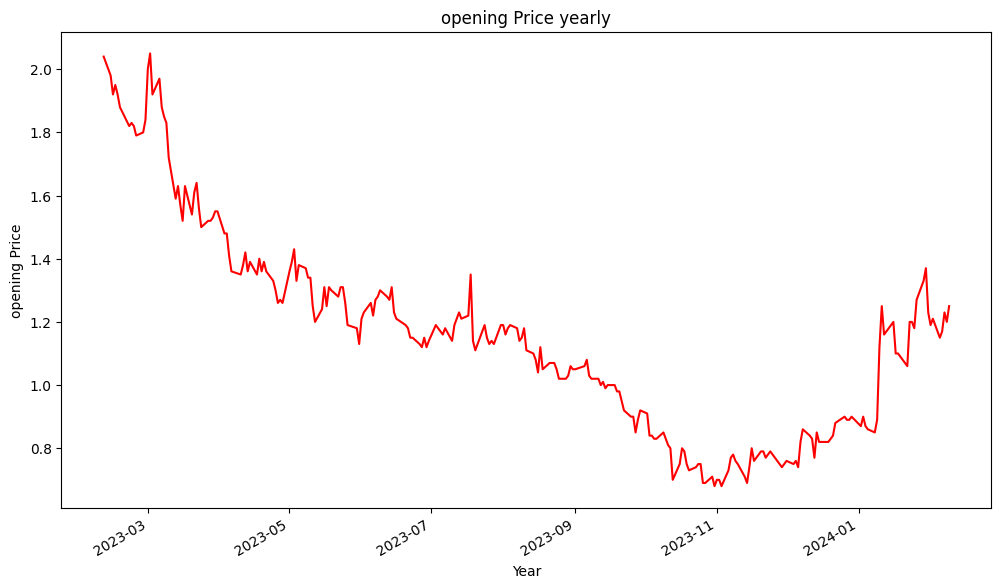

In [ ]:
plt.figure(figsize=(12,7))
df['open'].plot(color = 'r')

plt.xlabel('Year')
plt.ylabel('opening Price')
plt.title('opening Price yearly')
plt.show()

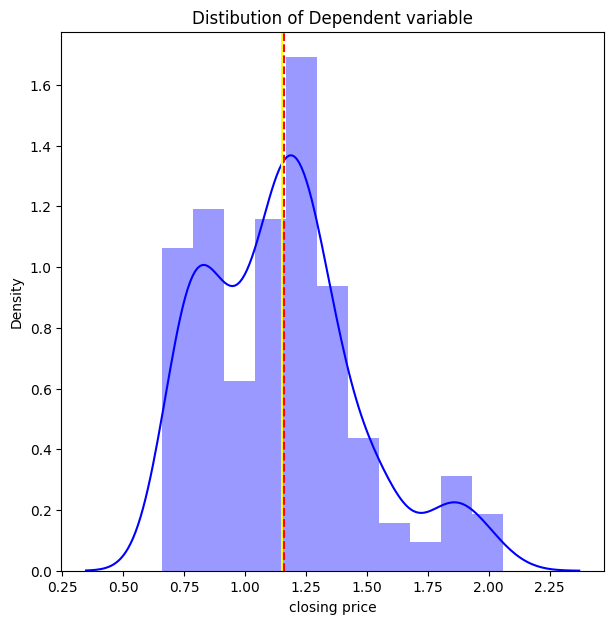

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['close'],color="b")
plt.title('Distibution of Dependent variable')
plt.xlabel('closing price')

plt.axvline(df['close'].mean(),color='yellow')
plt.axvline(df['close'].median(),color='red',linestyle='dashed')
plt.show()

1. Why did you pick the specific chart?

This graph is best suited to see the distributions across different variables.

2. What is/are the insight(s) found from the chart?

We can observe from the data that close column is somewhat following normal distribution.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

as we are aware that if the data is normally distributed, it becomes easy to develop a good model so can ne seen here .



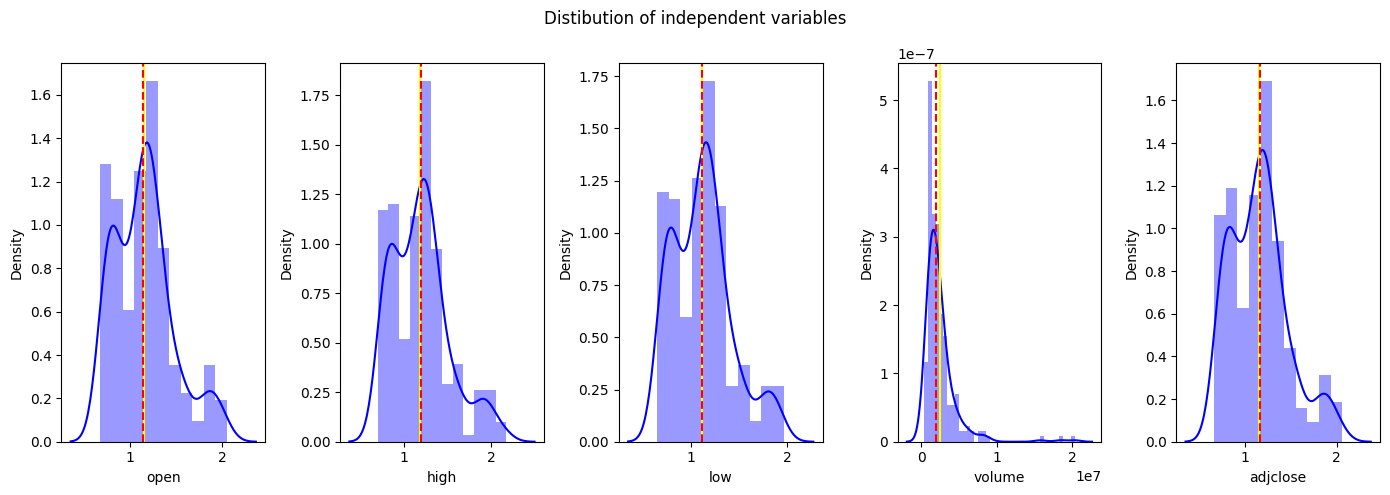

In [ ]:
plt.figure(figsize=(14, 5))
independent_variables = ['open', 'high', 'low',  'volume','adjclose']

for i, col in enumerate(independent_variables):
    plt.subplot(1, 5, i+1)
    sns.distplot(df[col], color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(df[col].mean(), color='yellow')
    plt.axvline(df[col].median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

 This graph is best suited to see the distributions across different variables.

2. What is/are the insight(s) found from the chart?

All the columns except volume are somewhat following normal distribution but volume column has right skewed distribution.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it was indeed helpful as we can build best model if the data is normally distributed and here most of the column are following normal distribution only.

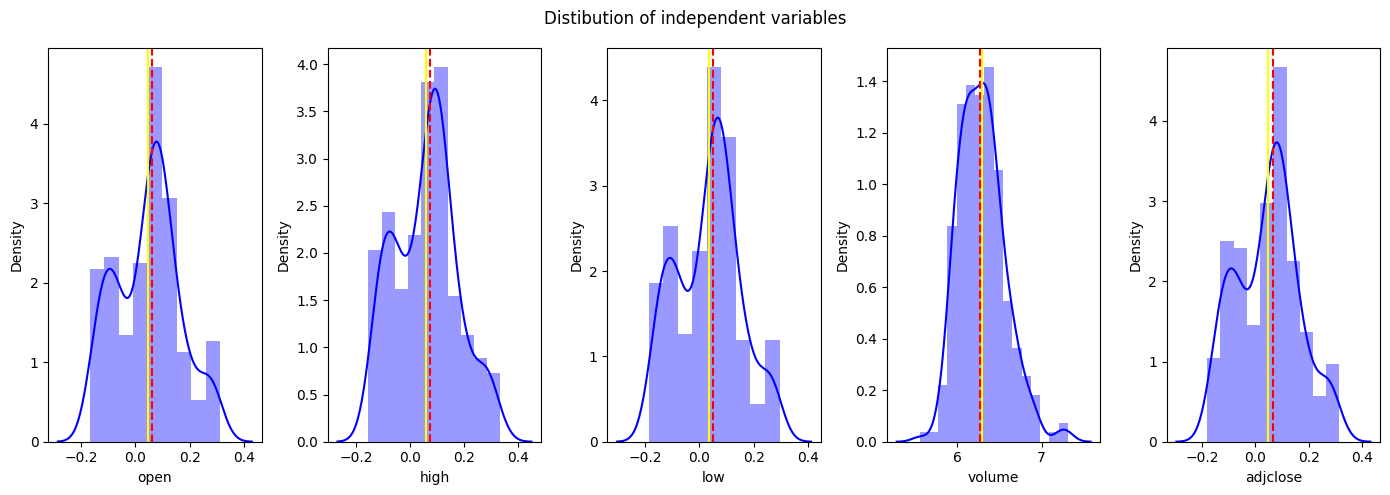

In [ ]:
plt.figure(figsize=(14, 5))
independent_variables = ['open', 'high', 'low',  'volume','adjclose']

for i, col in enumerate(independent_variables):
    plt.subplot(1, 5, i+1)
    sns.distplot(np.log10(df[col]), color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(np.log10(df[col]).mean(), color='yellow')
    plt.axvline(np.log10(df[col]).median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

This graph is best suited to see the distributions across different variables.

2. What is/are the insight(s) found from the chart?

After the log Transformation, the data of all indepedent variables closely follow normal distribution.


3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it was indeed helpful as we can build best model as after log Transforming the data is normally distributed and here most of the column are following normal distribution only.

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


<Figure size 1200x600 with 0 Axes>

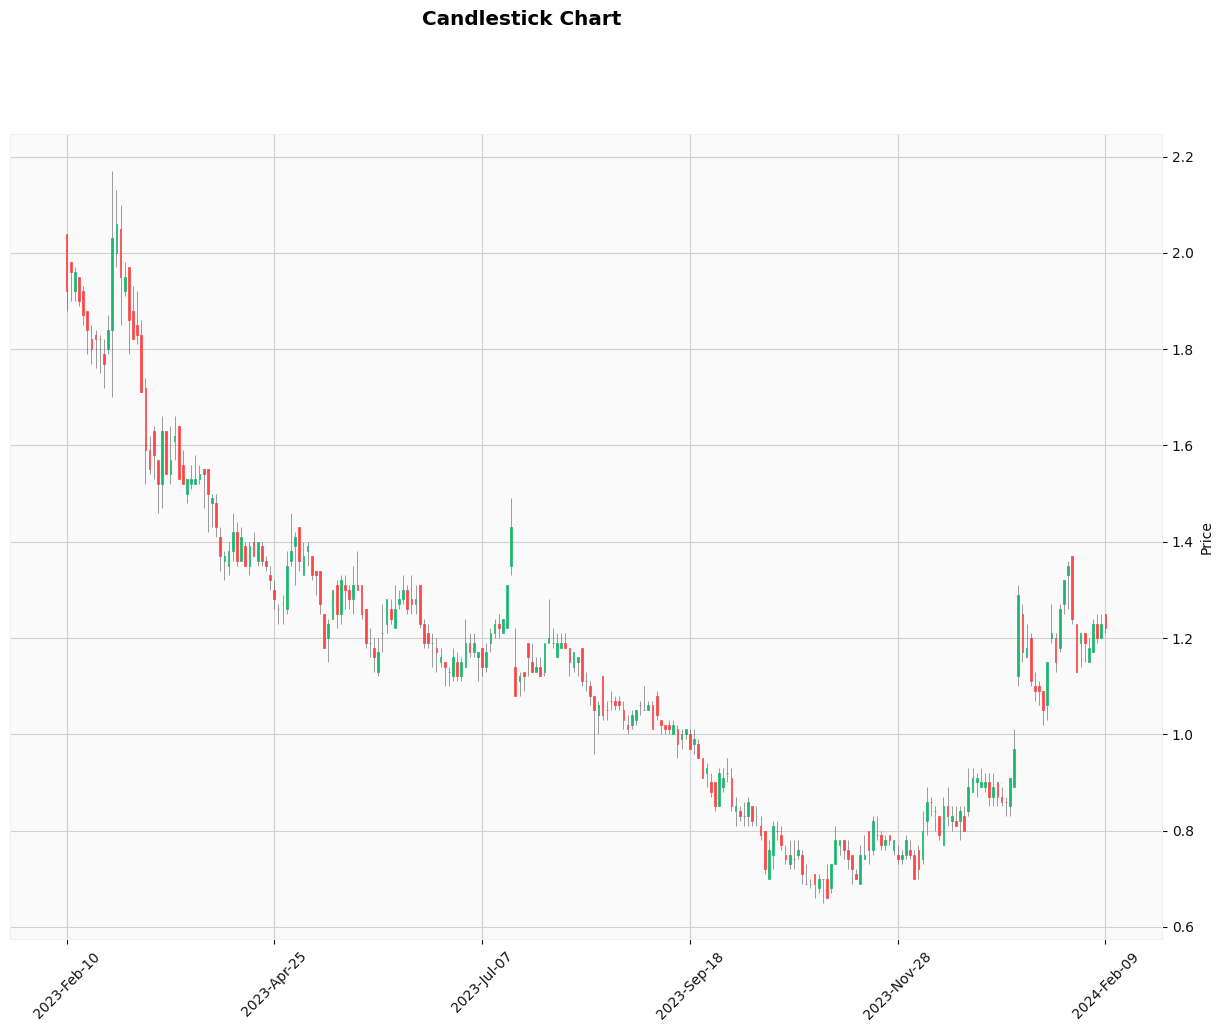

In [ ]:

plt.figure(figsize= (12,6))
import mplfinance as mpf

df_candle = df[['open', 'high', 'low', 'close']]

mpf.plot(df_candle, type='candle', style='yahoo',figscale=2, title='Candlestick Chart')

1. Why did you pick the specific chart?

A candlestick graph is primarily used in technical analysis of financial markets, particularly in stock trading, to visualize the price movements of a financial asset over a specific period of time

2. What is/are the insight(s) found from the chart?

It can be seen from the data that, there is no much deviation from the price shown by open, high, low.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It  is important to make sure that there is no huge variation in the data.

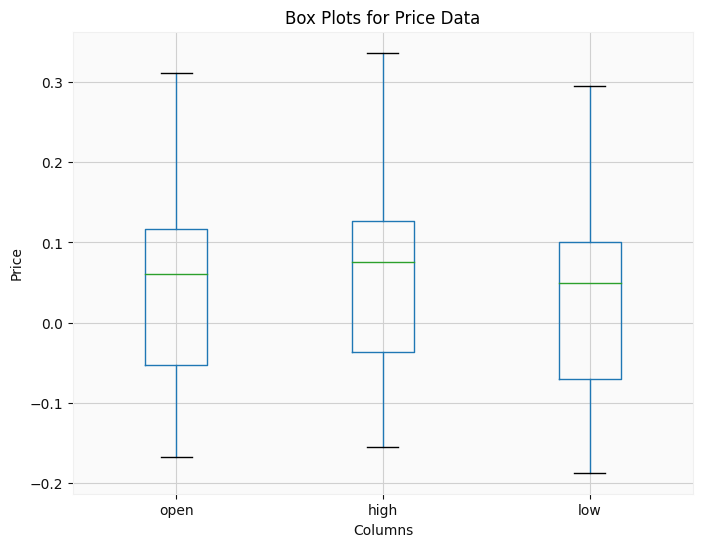

In [ ]:
df_price = np.log10(df[['open', 'high', 'low']])

plt.figure(figsize=(8, 6))
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

1. Why did you pick the specific chart?

BoxPlot is used to identify outliers exists or no in the independent variables.

2. What is/are the insight(s) found from the chart?

We can understand that after transformation is applied, outliers appeared to be diminished.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Outliers are mostly present in volume column and in the rest of the columns we dont have outliers that can help us to make a good model . Since the given dataset is small , it is also not advisable to completely remove outliers.

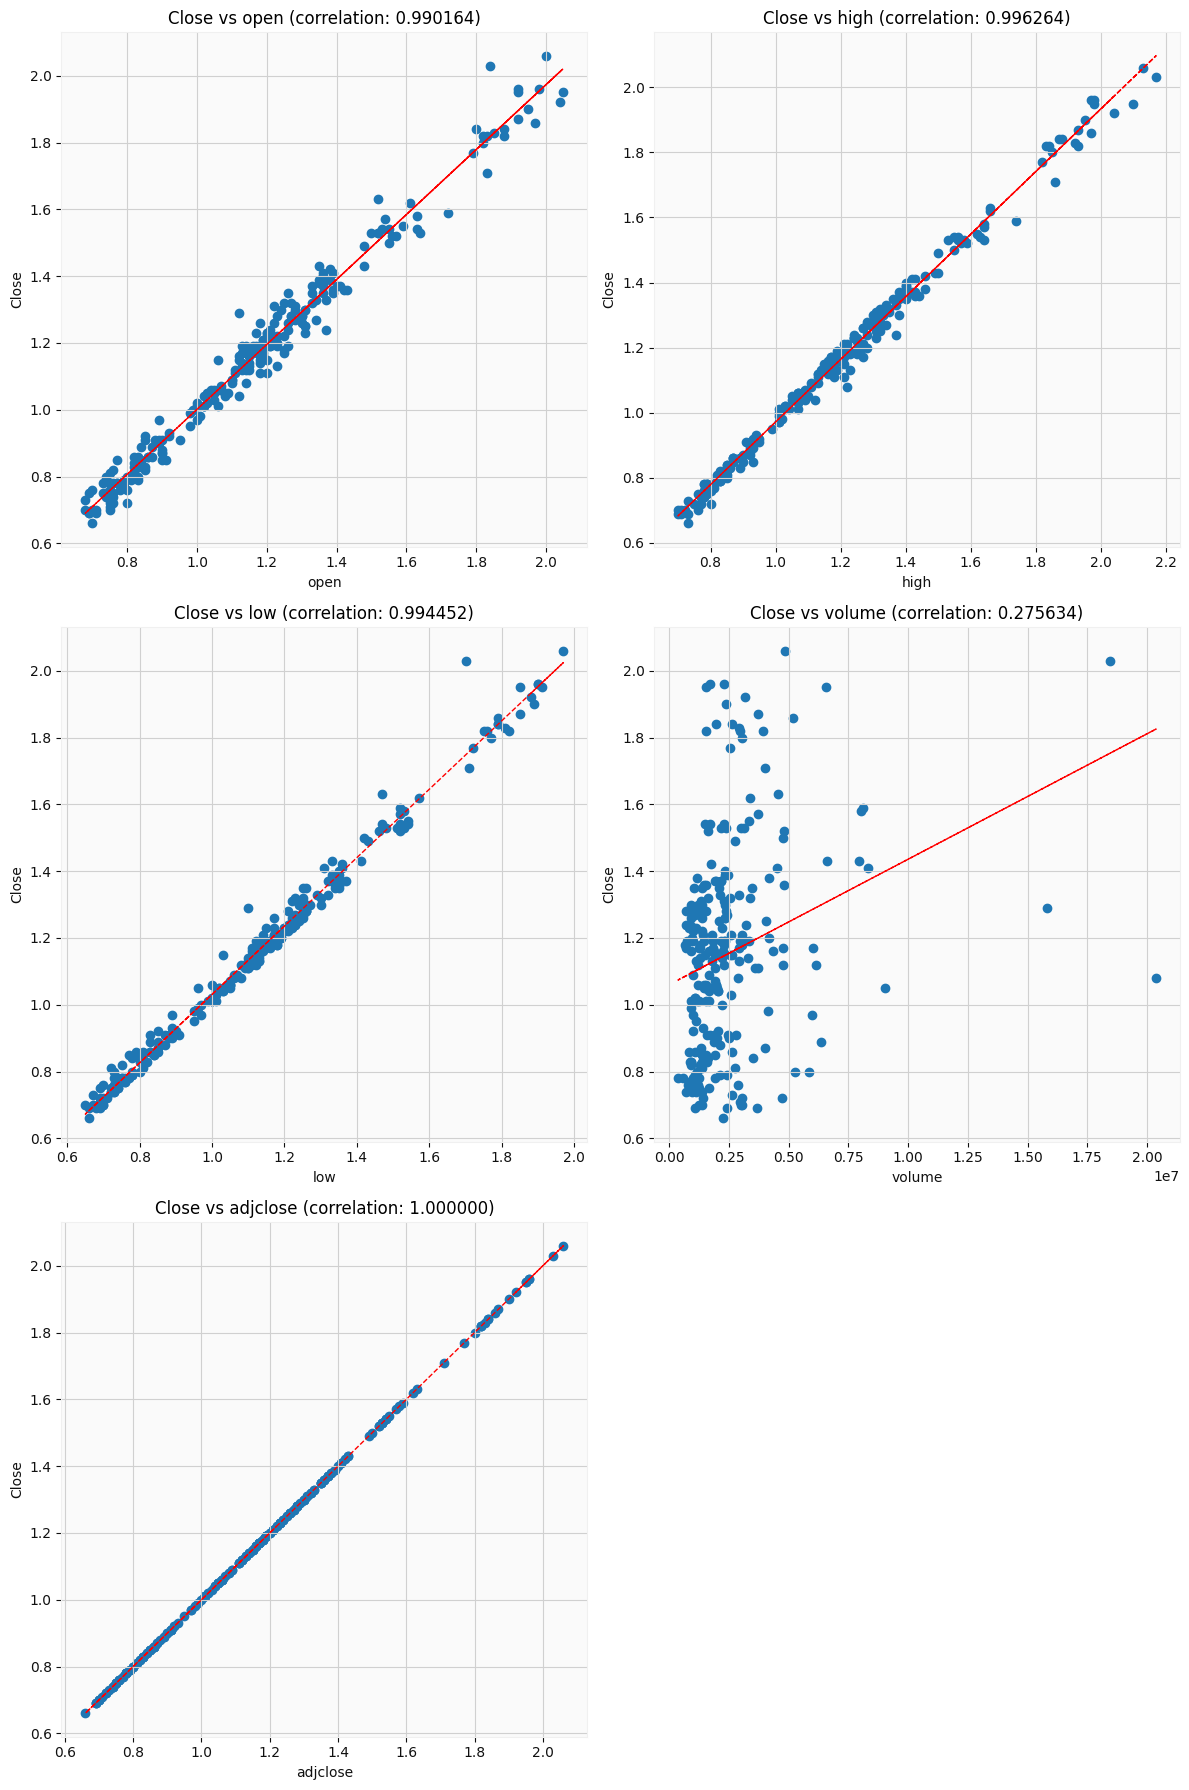

In [ ]:
# Assuming you have already defined 'independent_variables' and 'dataset_copy'

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

for i, col in enumerate(independent_variables):
    feature = df[col]
    label = df['close']
    correlation = feature.corr(label)

    # Scatter plot
    axes[i // 2, i % 2].scatter(x=feature, y=label)
    axes[i // 2, i % 2].set_xlabel(col)
    axes[i // 2, i % 2].set_ylabel('Close')
    axes[i // 2, i % 2].set_title(f'Close vs {col} (correlation: {correlation:.6f})')

    # Linear regression line
    z = np.polyfit(feature, label, 1)
    y_ = np.poly1d(z)(feature)
    axes[i // 2, i % 2].plot(feature, y_, "r--", lw=1)

# Remove any empty plots
for i in range(len(independent_variables), 6):
    fig.delaxes(axes[i // 2, i % 2])

plt.tight_layout()  # Adjust subplot spacing
plt.show()



<Axes: >

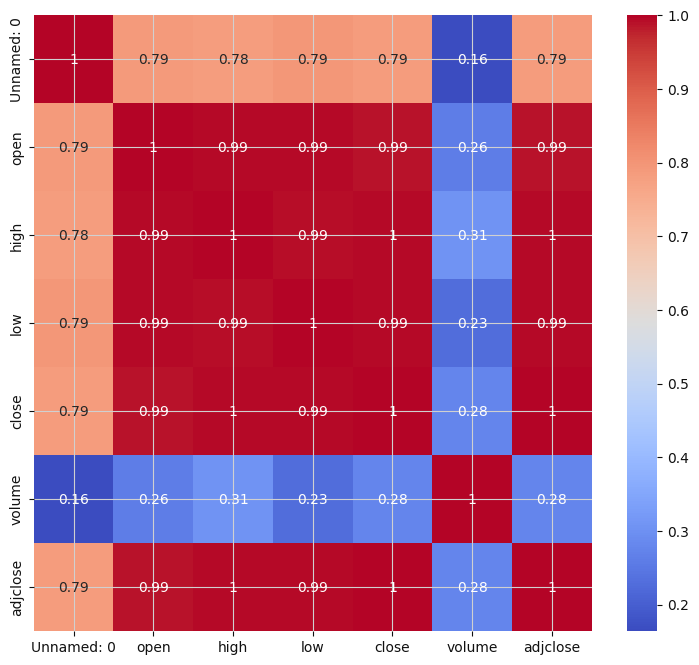

In [ ]:
plt.figure(figsize=(9,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

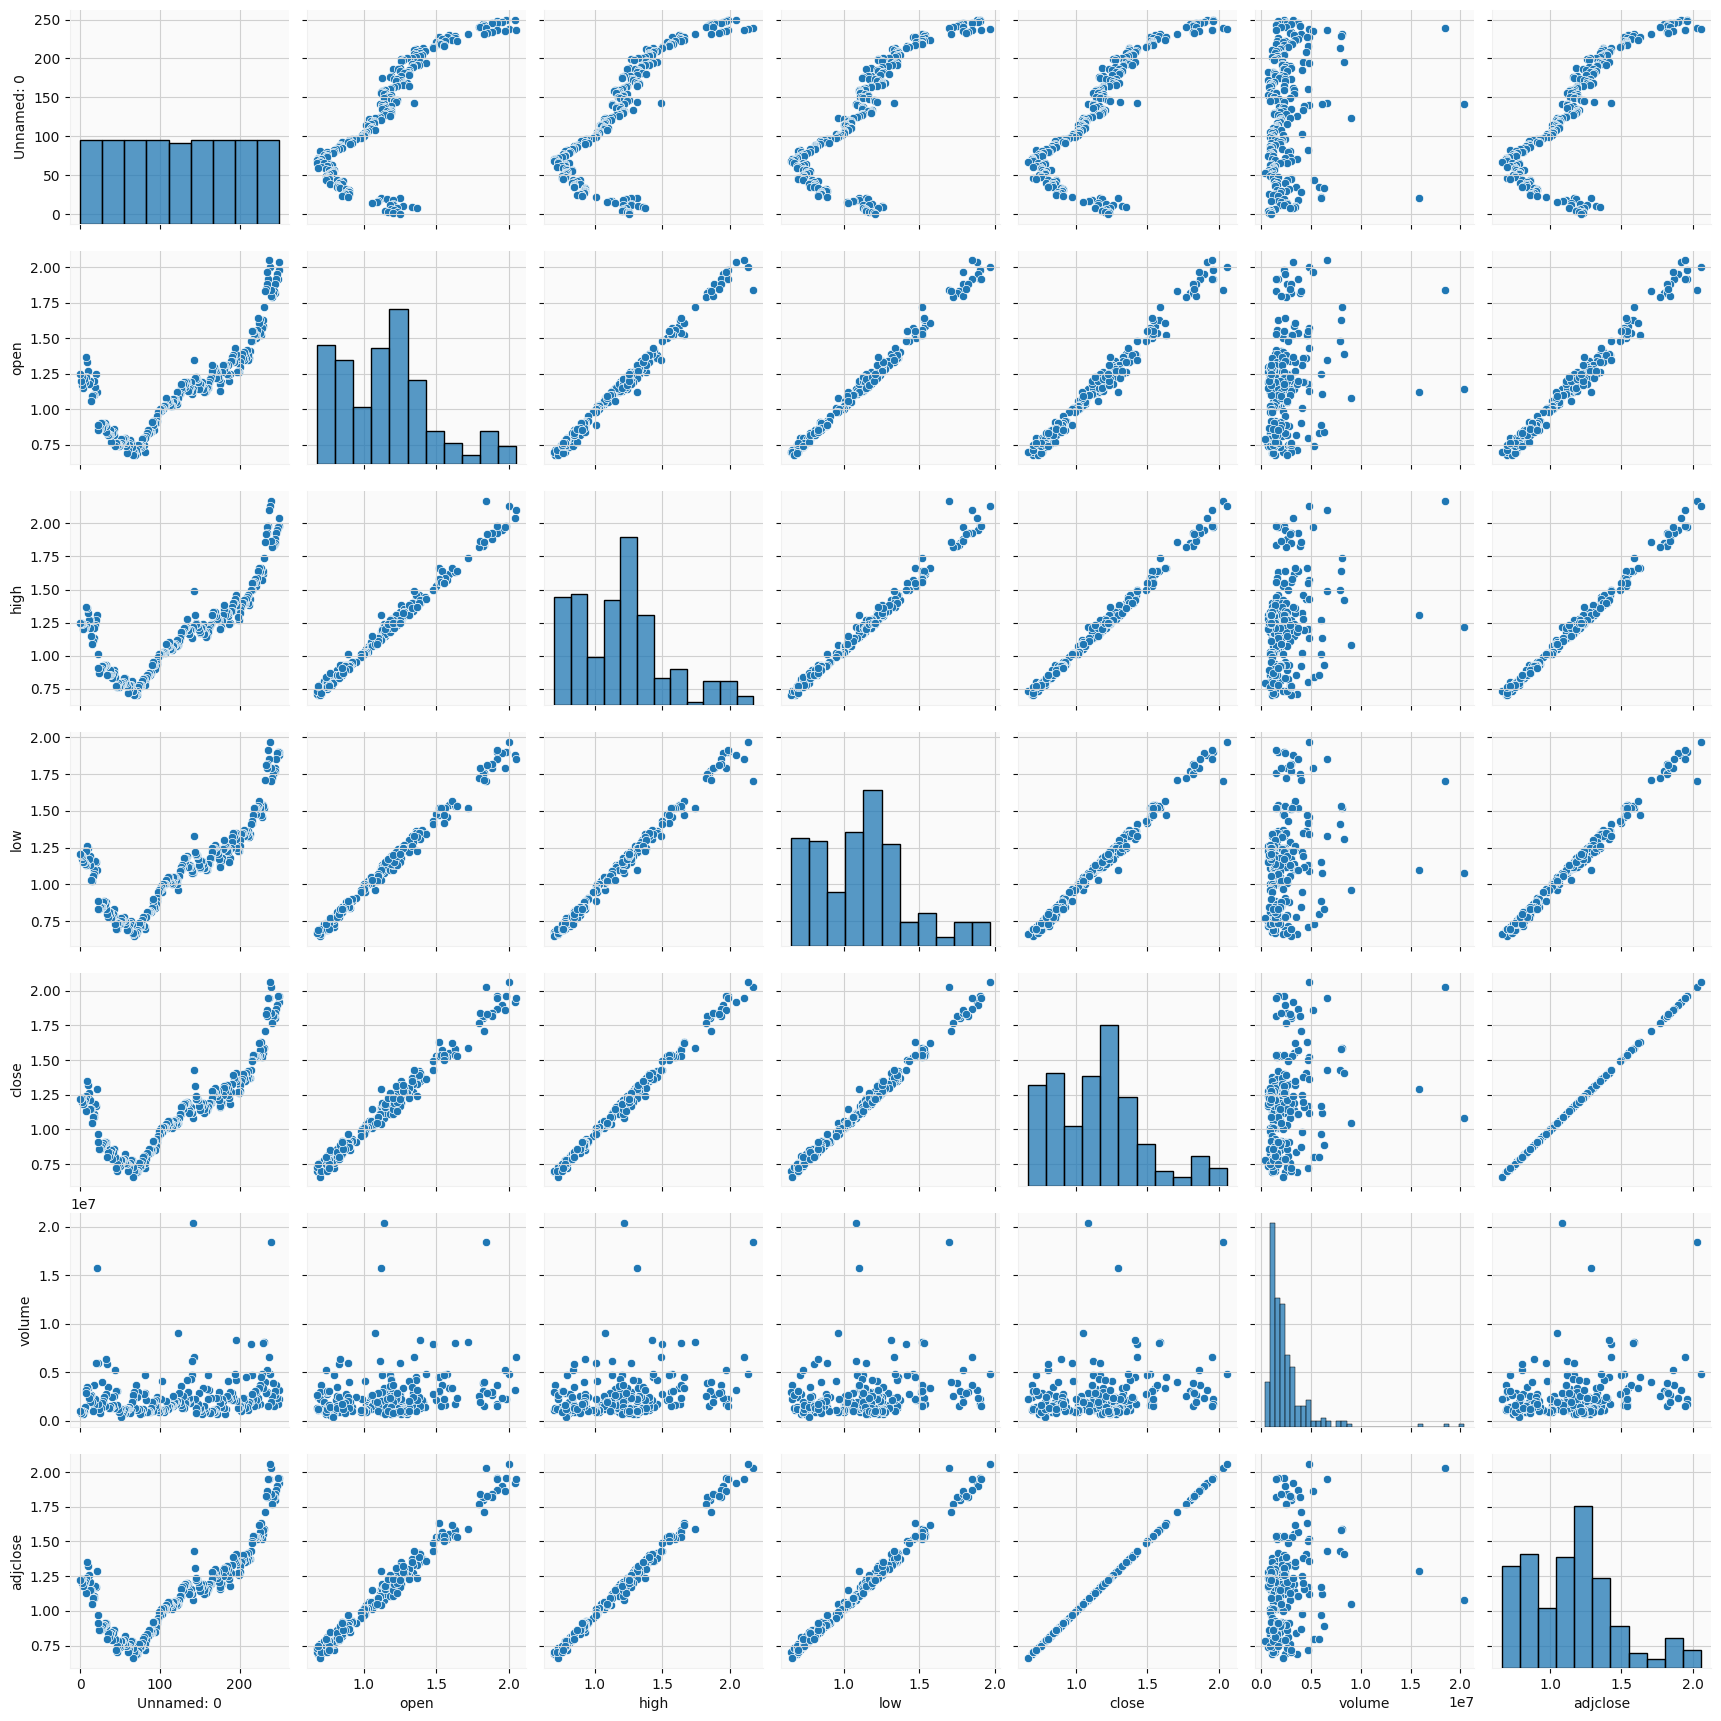

In [ ]:
# Pair Plot visualization code

sns.pairplot(df)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define hypothetical statements from the dataset. Perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Null Hypothesis (H0): There is no significant difference in the mean closing prices between the first 6 months and the last 6 months of the data.

Alternate Hypothesis (H1): There is a significant difference in the mean closing prices between the first 6 months and the last 6 months of the data.

#### 2. Perform an appropriate statistical test.

In [ ]:
start_date = min(df.index.date)
end_date = max(df.index.date)

In [ ]:
start_date = min(df.index.date)
end_date = max(df.index.date)

midpoint_date = start_date + (end_date - start_date) / 2

# Split the data
first_half = df[df.index.date < midpoint_date]
second_half = df[df.index.date >= midpoint_date]

In [ ]:
# Perform Statistical Test to obtain P-Value

# Divide the dataset into two halves: first half and second half
start_date = min(df.index.date)
end_date = max(df.index.date)

midpoint_date = start_date + (end_date - start_date) / 2

# Split the data
first_half = df[df.index.date < midpoint_date]
second_half = df[df.index.date >= midpoint_date]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half['close'])
mean2 = np.mean(second_half['close'])
std1 = np.std(first_half['close'])
std2 = np.std(second_half['close'])

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

se1 = std1 / np.sqrt(n1)
se2 = std2 / np.sqrt(n2)

# Calculate the standard error of the difference between means
standard_error = np.sqrt(se1**2 + se2**2)

# Calculate the t_test
t_stat = (mean1 - mean2) / standard_error

#Significance level
alpha = 0.05

#Degree of freedom
dodf = n1 + n2 - 2

#calculating probability point function
cv = stats.t.ppf(1.0 - alpha, dodf)

# Calculate the p-value (two-tailed test)
p_value = (1 - stats.t.cdf(abs(t_stat), dodf)) * 2

# Set the significance level
alpha = 0.05

print('The p value for 0.05 significance level is {:.5f}'.format(p_value))

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")

The p value for 0.05 significance level is 0.00000
Reject the null hypothesis. There is a significant difference in means.
